In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [5]:
# i = [[3, 4, 5], [4, 3, 1]]
# # i = np.array(i)
# if not list(i):
#     print("none")
# print(df.__array__)

# i = [2, 4, 5, 2]

df[df["SepalLengthCm"] > 5]["SepalWidthCm"]

0      3.5
5      3.9
10     3.7
14     4.0
15     4.4
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SepalWidthCm, Length: 118, dtype: float64

In [6]:
df.shape

(150, 5)

In [7]:
x = np.array([[[2, 3, 4]],
     [[3, 4, 5]]])

result = np.sqrt(np.sum((x[0] - x[1])**2, axis=1))
result

# np.amin(x, axis=1)
# data = df.to_numpy()

# np.random.uniform(np.amin(data, axis=0), np.argmax(data, axis=0), size=(2, data.shape[1]))

array([1.73205081])

In [8]:
# rand = np.random.randint(df["SepalLengthCm"].min()*10, df["SepalLengthCm"].max()*10) / 10
# rand
df.drop(columns="Id", inplace=True)

In [29]:
class Kmeans():
    # initialisasikan
    def __init__(self, max_iter=100, n_cluster=2, min_diff=0.00001):
        self.inertia = 0
        self.n_cluster = n_cluster
        self.min_diff = min_diff
        self.max_iter = max_iter
        self.centroids = None

    # menghitung jarak uclidean
    @staticmethod
    def euclidean_distance(point1, point2):
        return np.sqrt(np.sum((point2 - point1)**2, axis=1))
    
    # melakukan training data
    def fit(self, x):
        # menentukan centroid secara acak (di awal-awal)
        self.centroids = np.random.uniform(np.amin(x, axis=0), np.amax(x, axis=0), size=(self.n_cluster, x.shape[1]))

        # melakukan iterasi
        for iteration in range(self.max_iter):
            # menghilangkan label ke awal
            y = []
            distance_w_cluster = [] # digunakan untuk menghitung distance yang paling kecil (untuk inertia)

            # menentukan labelnya / termasuk cluster apa (dengan menentukan jarak euclidian nya)
            for item in x:
                distances = Kmeans.euclidean_distance(item, self.centroids) # menghitung jarak setiap centroid
                distance_w_cluster.append(distances.min()) # menentukan jarak terkecil
                cluster = np.argmin(distances) # menentukan termasuk cluster apa dengan mencari jarak terkecilnya
                y.append(cluster)

            y = np.array(y)

            # untuk memisahkan antar cluster
            groups = []

            for i in range(self.n_cluster):
                groups.append(np.argwhere(y == i)) # mencari yang mana label sama dengan i 
            # print(groups)
            
            # menentukan centroid yang baru
            new_centroid = []
            inertia_group = []
            distance_w_cluster = np.array(distance_w_cluster)
            for i, indices in enumerate(groups):
                if len(indices) == 0: # jika ada centroid yang tak punya member
                    new_centroid.append(self.centroids[i]) # gunakan centroid yang sebelumnya
                else:
                    inertia_group.append(np.sum(distance_w_cluster[indices]))
                    new_centroid.append(np.mean(x[indices], axis=0)[0]) # mencari rata-rata dari centroid sebelumnya
            # print(np.sum(distance_w_cluster))
            # counting the error (inetia)
            self.inertia = np.mean(np.array(inertia_group)**2)

            print("iterasi ke", iteration, " :", self.centroids)
            # if the centroid not move the position from previous iteration
            if np.max(np.abs(self.centroids - np.array(new_centroid))) < self.min_diff:
                print(np.abs(np.array(new_centroid)))
                print(np.abs(np.array(self.centroids)))
                break
            else:
                self.centroids = np.array(new_centroid) # update centroid position
            


In [30]:
k_mean = Kmeans(n_cluster=3)
k_mean.fit(df.to_numpy())

iterasi ke 0  : [[6.70133108 3.25769148 5.11307209 0.31464151]
 [7.52115002 2.41735005 4.98111161 1.48821329]
 [7.25379166 3.99874862 4.58729501 1.66289321]]
iterasi ke 1  : [[5.2575     3.04375    2.66375    0.7       ]
 [6.60909091 2.83181818 5.39772727 1.89318182]
 [6.35       3.46153846 4.35384615 1.55769231]]
iterasi ke 2  : [[5.04482759 3.28275862 1.73965517 0.35689655]
 [6.61851852 2.9537037  5.50925926 1.98148148]
 [5.96052632 2.84736842 4.35263158 1.37105263]]
iterasi ke 3  : [[5.00784314 3.4        1.49411765 0.26078431]
 [6.77111111 3.03555556 5.62       2.02      ]
 [5.85925926 2.74259259 4.3462963  1.4       ]]
iterasi ke 4  : [[5.006      3.418      1.464      0.244     ]
 [6.81463415 3.05609756 5.68292683 2.05853659]
 [5.8779661  2.7440678  4.36610169 1.41016949]]
iterasi ke 5  : [[5.006      3.418      1.464      0.244     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
[[5.006      3.418      1.464      0.244     ]
 [6.8

In [31]:
k_mean.centroids

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [32]:
k_mean.inertia

1129.8509219514633

iterasi ke 0  : [[6.50984524 2.87607424 4.28479465 1.81839038]]
iterasi ke 1  : [[5.84333333 3.054      3.75866667 1.19866667]]
[[5.84333333 3.054      3.75866667 1.19866667]]
[[5.84333333 3.054      3.75866667 1.19866667]]
iterasi ke 0  : [[6.0368754  2.32506106 4.8420568  1.150115  ]
 [7.26640706 3.61873391 2.73548586 0.34752841]]
iterasi ke 1  : [[6.262 2.872 4.906 1.676]
 [5.006 3.418 1.464 0.244]]
iterasi ke 2  : [[6.2877551  2.88061224 4.94183673 1.68877551]
 [5.00576923 3.38076923 1.52884615 0.275     ]]
iterasi ke 3  : [[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36037736 1.56226415 0.28867925]]
[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36037736 1.56226415 0.28867925]]
[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36037736 1.56226415 0.28867925]]
iterasi ke 0  : [[5.24889391 3.55534924 3.82323918 1.82826372]
 [7.54010867 2.63327677 6.14125126 2.21953213]
 [5.63848019 2.75259    6.79210911 1.21687157]]
iterasi ke 1  : [[5.4560

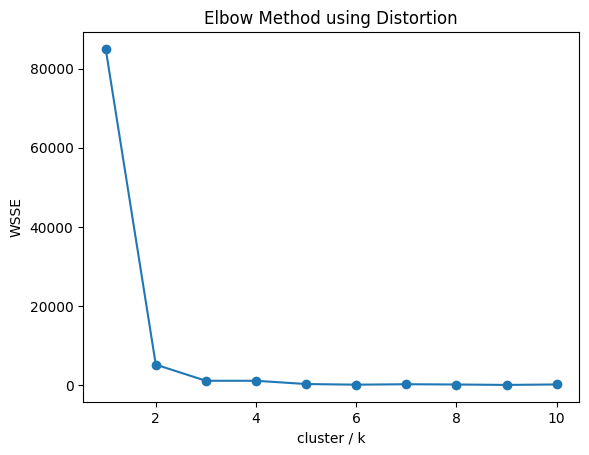

In [34]:
wcss = []
for i in range(1, 11):
    km = Kmeans(n_cluster=i)
    km.fit(df.to_numpy())
    wcss.append(km.inertia)

plt.plot(np.arange(1, 11), wcss, marker='o')
plt.title("Elbow Method using Distortion")
plt.xlabel("cluster / k")
plt.ylabel("WSSE")
print(wcss)